In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
from supports._setting import individual_detail_dir
from supports.charts import multiple_line_chart
from supports.charts import x_twin_chart
from prettytable import PrettyTable
import scipy.stats as stats
#
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Y09_general = pd.read_csv('%s/Y09-individual-general.csv' % (individual_detail_dir))
Y10_general = pd.read_csv('%s/Y10-individual-general.csv' % (individual_detail_dir))
#
Y09_prev_in = pd.read_csv('%s/Y09-individual-prev-in-ap.csv' % (individual_detail_dir))
Y10_prev_in = pd.read_csv('%s/Y10-individual-prev-in-ap.csv' % (individual_detail_dir))
Y09_prev_out = pd.read_csv('%s/Y09-individual-prev-out-ap.csv' % (individual_detail_dir))
Y10_prev_out = pd.read_csv('%s/Y10-individual-prev-out-ap.csv' % (individual_detail_dir))

In [3]:
# Filtering
HOUR, CENT = 60*60, 100
PROD_LIMIT = 65 / HOUR * CENT
#
Y09_general = Y09_general[(Y09_general['total-prod']  < PROD_LIMIT)]
Y10_general = Y10_general[(Y10_general['total-prod']  < PROD_LIMIT)]
#
Y09_prev_in = Y09_prev_in[(Y09_prev_in['ap-prod'] < PROD_LIMIT)]
Y09_prev_in = Y09_prev_in[(0 < Y09_prev_in['op-cost'])]
Y10_prev_in = Y10_prev_in[(Y10_prev_in['ap-prod'] < PROD_LIMIT)]
Y10_prev_in = Y10_prev_in[(0 < Y10_prev_in['op-cost'])]
#
Y09_prev_out = Y09_prev_out[(Y09_prev_out['ap-prod'] < PROD_LIMIT)]
Y09_prev_out = Y09_prev_out[(0 < Y09_prev_out['op-cost'])]
Y10_prev_out = Y10_prev_out[(Y10_prev_out['ap-prod'] < PROD_LIMIT)]
Y10_prev_out = Y10_prev_out[(0 < Y10_prev_out['op-cost'])]

In [4]:
# both years
Y09_did, Y10_did = set(Y09_general['did']), set(Y10_general['did'])
both_years_full_drivers = list(Y09_did.intersection(Y10_did))
#
Y09_general = Y09_general[Y09_general['did'].isin(both_years_full_drivers)]
Y10_general = Y10_general[Y10_general['did'].isin(both_years_full_drivers)]
#
Y09_prev_in = Y09_prev_in[Y09_prev_in['did'].isin(both_years_full_drivers)]
Y10_prev_in = Y10_prev_in[Y10_prev_in['did'].isin(both_years_full_drivers)]
#
Y09_prev_out = Y09_prev_out[Y09_prev_out['did'].isin(both_years_full_drivers)]
Y10_prev_out = Y10_prev_out[Y10_prev_out['did'].isin(both_years_full_drivers)]

In [5]:
Y09_general_gb, Y10_general_gb = Y09_general.groupby(['mm']), Y10_general.groupby(['mm'])
Y09_driver_general_prod = Y09_general_gb.mean()['total-prod'].to_frame('avg_total_prod').reset_index()
Y10_driver_general_prod = Y10_general_gb.mean()['total-prod'].to_frame('avg_total_prod').reset_index()
#
Y09_prev_in_gb, Y10_prev_in_gb = Y09_prev_in.groupby(['mm']), Y10_prev_in.groupby(['mm'])
Y09_prev_in_mm_ap_prod = Y09_prev_in_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
Y10_prev_in_mm_ap_prod = Y10_prev_in_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
Y09_prev_in_mm_eco_pro = Y09_prev_in_gb.mean()['ap-eco-profit'].to_frame('avg_eco_pro').reset_index()
Y10_prev_in_mm_eco_pro = Y10_prev_in_gb.mean()['ap-eco-profit'].to_frame('avg_eco_pro').reset_index()
#
Y09_prev_out_gb, Y10_prev_out_gb = Y09_prev_out.groupby(['mm']), Y10_prev_out.groupby(['mm'])
Y09_prev_out_mm_ap_prod = Y09_prev_out_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
Y10_prev_out_mm_ap_prod = Y10_prev_out_gb.mean()['ap-prod'].to_frame('avg_ap_prod').reset_index()
Y09_prev_out_mm_eco_pro = Y09_prev_out_gb.mean()['ap-eco-profit'].to_frame('avg_eco_pro').reset_index()
Y10_prev_out_mm_eco_pro = Y10_prev_out_gb.mean()['ap-eco-profit'].to_frame('avg_eco_pro').reset_index()


In [6]:
measure_year_data = {('General prod.','Y09'): [prod * HOUR / CENT for _, prod in Y09_driver_general_prod.values],
                     ('General prod.','Y10'): [prod * HOUR / CENT for _, prod in Y10_driver_general_prod.values],
                     #
                     ('AP in prod.','Y09'): [prod * HOUR / CENT for _, prod in Y09_prev_in_mm_ap_prod.values],
                     ('AP in prod.','Y10'): [prod * HOUR / CENT for _, prod in Y10_prev_in_mm_ap_prod.values],
                     ('AP out prod.','Y09'): [prod * HOUR / CENT for _, prod in Y09_prev_out_mm_ap_prod.values],
                     ('AP out prod.','Y10'): [prod * HOUR / CENT for _, prod in Y10_prev_out_mm_ap_prod.values],
                     #
                     ('AP in eco.','Y09'): [eco / CENT for _, eco in Y09_prev_in_mm_eco_pro.values],
                     ('AP in eco.','Y10'): [eco / CENT for _, eco in Y10_prev_in_mm_eco_pro.values],
                     ('AP out eco.','Y09'): [eco / CENT for _, eco in Y09_prev_out_mm_eco_pro.values],
                     ('AP out eco.','Y10'): [eco / CENT for _, eco in Y10_prev_out_mm_eco_pro.values],
                    }


In [7]:
mean_t_test = lambda l1, l2: ("{:.2f}".format(np.mean(l1)), "{:.2f}".format(np.mean(l2)), 
                              "{:.2f}".format(np.mean([l2[i] - l1[i] for i in xrange(len(l2))])),
                              "{:.2f}".format(np.std([l2[i] - l1[i] for i in xrange(len(l2))])),
                              "{:.2e}".format(stats.ttest_ind(l1, l2, equal_var = False)[1]))

prod_eco_table = PrettyTable(["Measeure", "Y2009", "Y2010", "Diff.", "S.D","t-test (p-value)"])
prod_eco_table.align["Measeure"] = "l"

measure_data = [
    ['General prod.',(measure_year_data[('General prod.', 'Y09')], measure_year_data[('General prod.', 'Y10')])],
    ['AP in prod.',  (measure_year_data[('AP in prod.', 'Y09')], measure_year_data[('AP in prod.', 'Y10')])],
    ['AP out prod.', (measure_year_data[('AP out prod.', 'Y09')], measure_year_data[('AP out prod.', 'Y10')])],
    ['AP in eco.',   (measure_year_data[('AP in eco.', 'Y09')], measure_year_data[('AP in eco.', 'Y10')])],
    ['AP out eco.',  (measure_year_data[('AP out eco.', 'Y09')], measure_year_data[('AP out eco.', 'Y10')])],
]

for measure, (l1, l2) in measure_data:
    arg1, arg2, arg3, arg4, arg5 = mean_t_test(l1,l2)
    prod_eco_table.add_row([measure,arg1, arg2, arg3, arg4, arg5])
print prod_eco_table

+---------------+-------+-------+-------+-------+------------------+
| Measeure      | Y2009 | Y2010 | Diff. |  S.D  | t-test (p-value) |
+---------------+-------+-------+-------+-------+------------------+
| General prod. | 23.65 | 25.90 |  2.26 |  0.65 |     1.75e-07     |
| AP in prod.   | 24.07 | 25.92 |  1.85 |  0.88 |     1.01e-04     |
| AP out prod.  | 22.83 | 25.19 |  2.35 |  0.85 |     7.96e-06     |
| AP in eco.    | 25.43 | 38.78 | 13.34 |  4.87 |     2.35e-06     |
| AP out eco.   | 76.97 | 88.88 | 11.91 | 11.38 |     6.73e-03     |
+---------------+-------+-------+-------+-------+------------------+


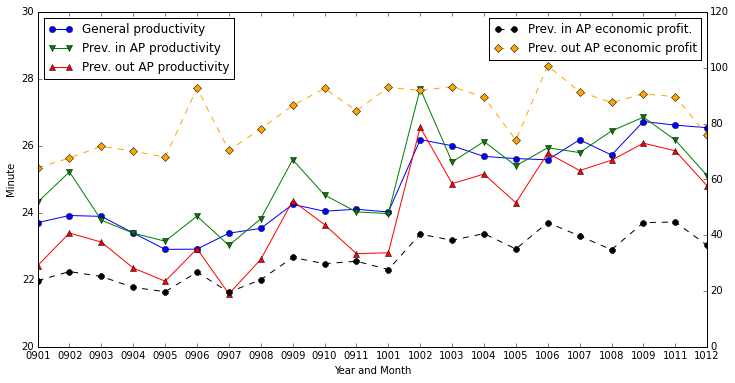

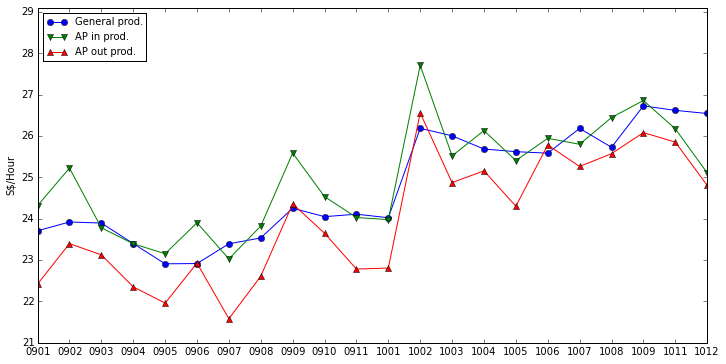

In [9]:
months = ['0901', '0902', '0903', '0904', '0905', '0906', '0907', '0908', '0909', '0910', '0911', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1011', '1012']
y_legends1, y_legends2 = ['General prod.', 'AP in prod.', 'AP out prod.'], ['AP in eco.', 'AP out eco.']


multi_y_data1, multi_y_data2 = [], []
for measure in y_legends1:
    for y in ['Y09','Y10']:
        if y == 'Y09':
            multi_y_data1.append([])
        multi_y_data1[-1] += measure_year_data[(measure,y)]
for measure in y_legends2:
    for y in ['Y09','Y10']:
        if y == 'Y09':
            multi_y_data2.append([])
        multi_y_data2[-1]+=measure_year_data[(measure,y)]
x_info = ('Year and Month', months, 0)
y_info1 = ('Minute', multi_y_data1, (20,30), ['General productivity', 'Prev. in AP productivity', 'Prev. out AP productivity'], 'upper left')
y_info2 = ('', multi_y_data2, (0,120), ['Prev. in AP economic profit.', 'Prev. out AP economic profit'], 'upper right') 

x_twin_chart((12, 6), '', x_info, y_info1, y_info2, 'temp')

multiple_line_chart((12,6),'', '', 'S$/Hour', (months,0), multi_y_data1, y_legends1, 'upper left', None)